In [1]:
import sys
import os
curr_dir=os.getcwd()

current_dir = os.path.dirname(os.path.abspath(curr_dir))
# parent_dir = os.path.dirname(current_dir)
src_dir = os.path.dirname(current_dir) 
sys.path.append(current_dir) 
sys.path.append(current_dir+'\\src') 



In [2]:


import igraph as ig


In [3]:
import random

# 用 Python 自带的随机数种子间接控制
random.seed(42)

In [4]:
from  graph_diffuse_with_source.gds import Gds as Gds


In [5]:
def normalize_node_data(node_data):
    
    
    total = sum([v[1] for v in node_data])
    if total>0:
        node_data_2=[[k,v/total] for k,v in node_data]
    else:
        node_data_2=[[k,v] for k,v in node_data]

    return node_data_2

In [6]:

# 加载图

random.seed(42)
node_num =144
G = ig.Graph.Barabasi(n=node_num,m=2)
for i in range(0,node_num):
    G.vs[i]['node_id'] = str(i)


# 创建Gds实例，查找中央节点

中心节点: {'1': 0.019765429042873577, '2': 0.021117860521401546, '4': 0.01593483641019761, '0': 0.01717420919723552, '8': 0.016065534733297897, '5': 0.02096522609132259, '18': 0.014436026936026941}


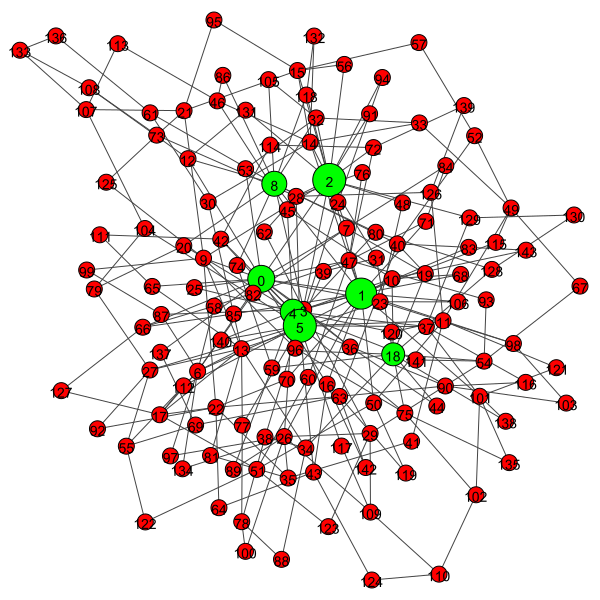

In [7]:

# 创建Gds实例
gds = Gds(G)

# 添加源节点
source_nodes = list(gds.nodeid_id_dict.keys())
gds.add_one_node_ids(source_nodes)

gds.FADE=0.3

# 执行传播
for _ in range(1):  # 迭代5次
    gds.add_one_node_ids(source_nodes)
    gds.emit_to_buffer(source_nodes)
    gds.merge_from_buffer()



# 计算中心节点
central_nodes = gds.show_central()
print("中心节点:", central_nodes)
# 可视化
node_data = [(node_id, score) for node_id, score in central_nodes.items()]
node_data=normalize_node_data(node_data)
gds.show_nodes(node_data)
ig.plot(gds.G,vertex_label=gds.G.vs["node_id"])


In [8]:
neighbors = gds.G.vs[4].neighbors()
print(neighbors)

[igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 0, {'node_id': '0', 'color': 'green', 'size': 27}), igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 1, {'node_id': '1', 'color': 'green', 'size': 31}), igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 20, {'node_id': '20', 'color': 'red', 'size': 16}), igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 25, {'node_id': '25', 'color': 'red', 'size': 16}), igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 26, {'node_id': '26', 'color': 'red', 'size': 16}), igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 37, {'node_id': '37', 'color': 'red', 'size': 16}), igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 42, {'node_id': '42', 'color': 'red', 'size': 16}), igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 45, {'node_id': '45', 'color': 'red', 'size': 16}), igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 59, {'node_id': '59', 'color': 'red', 'size': 16}), 

node_and_neighbors ['15', '2', '14', '21', '56', '57', '95']
15 关联节点: {'2': 0.2861111111111112, '0': 0.01666666666666667, '14': 0.10000000000000002, '1': 0.01666666666666667, '15': 0.07222222222222223, '56': 0.025000000000000005, '5': 0.01666666666666667, '7': 0.01666666666666667, '21': 0.06944444444444445, '9': 0.01666666666666667, '57': 0.03611111111111112, '95': 0.02777777777777778, '24': 0.01666666666666667, '28': 0.01666666666666667, '30': 0.01666666666666667, '31': 0.01666666666666667, '32': 0.01666666666666667, '33': 0.01666666666666667, '46': 0.01666666666666667, '48': 0.01666666666666667, '52': 0.01666666666666667, '72': 0.01666666666666667, '73': 0.01666666666666667, '91': 0.01666666666666667, '94': 0.01666666666666667, '107': 0.01666666666666667, '118': 0.01666666666666667, '129': 0.01666666666666667, '131': 0.01666666666666667, '132': 0.01666666666666667}
[2, 0, 14, 1, 15, 56, 5, 7, 21, 9, 57, 95, 24, 28, 30, 31, 32, 33, 46, 48, 52, 72, 73, 91, 94, 107, 118, 129, 131, 132]


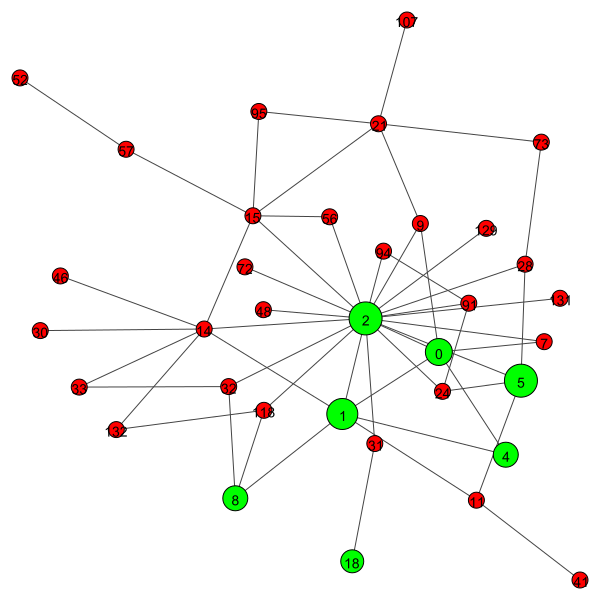

In [9]:
# 修改种子
random.seed(42)
# 创建Gds实例
gds = Gds(G)
# 添加源节点

selected_nodes = ['15','24','33','41']

# gds.FADE=0.3
# gds.LIMIT=0.002
result_node =[]
nodeids_all = list(gds.nodeid_id_dict.keys())
for node in selected_nodes:
    # 执行传播
    result_node.append(gds.nodeid_id_dict[node])
    vid = gds.nodeid_id_dict[node]
    neighbors = gds.G.vs[vid].neighbors()
    # print(neighbors)
    neighbors_vids =[i.index for i in neighbors]
    neighbors_nodeids =[gds.id_nodeid_dict[i] for i in neighbors_vids]
    node_and_neighbors =[node]+neighbors_nodeids
    print('node_and_neighbors',node_and_neighbors)


    for _ in range(1): 
        gds.add_one_node_ids(node_and_neighbors)
        gds.add_one_node_ids([node])
        gds.emit_to_buffer(nodeids_all)
        gds.merge_from_buffer()


    # 计算中心节点
    central_nodes = gds.show_central()
    print(node,"关联节点:", central_nodes)


    # 可视化
    node_data = [(node_id, score) for node_id, score in central_nodes.items()]


    nodes_vids =[gds.nodeid_id_dict[i[0]] for i in node_data]
    print(nodes_vids)
    result_node.extend(nodes_vids)
result_node=list(set(result_node))
black_subgraph =gds.G.subgraph(result_node)
print(result_node)
ig.plot(black_subgraph,vertex_label=black_subgraph.vs["node_id"])


In [10]:
node

'41'

In [11]:
vid = gds.nodeid_id_dict[node]
neighbors = gds.G.vs[vid].neighbors()
# print(neighbors)
neighbors_vids =[i.index for i in neighbors]
neighbors_nodeids =[gds.id_nodeid_dict[i] for i in neighbors_vids]
node_and_neighbors =[node]+neighbors_nodeids
print('node_and_neighbors',node_and_neighbors)


for _ in range(1): 
    gds.add_one_node_ids([node_and_neighbors])
    gds.emit_to_buffer(node_and_neighbors)
    # gds.merge_from_buffer()

node_and_neighbors ['41', '11', '35']


In [12]:
gds.nodeid_msg_dict['33']

'{"2": 0.06804813914955142, "14": 0.12579849988950415, "15": 0.025211665428756996, "1": 0.022269350803737226, "33": 0.5321477454986158, "32": 0.11634289426059567, "49": 0.11018170496923883}'

In [13]:
gds.nodeid_msg_dict['32']

'{"2": 0.10539198314158933, "14": 0.03947476209433231, "0": 0.023340418156468406, "32": 0.5430335960538912, "105": 0.06590046957489176, "8": 0.07841969013286641, "33": 0.06378008593754118, "49": 0.018266686700518325, "53": 0.06239230820790102}'

In [14]:
gds.nodeid_buffer_dict['33']

'[]'

In [15]:
gds.merge_from_buffer()

['15', '41', '33'] 关联节点: {'15': 0.18242862801686327, '2': 0.06731601731601729, '41': 0.06536796536796535, '11': 0.06731601731601729, '33': 0.08437667996491524, '14': 0.0619825708061002, '21': 0.06731601731601729, '32': 0.06731601731601729, '35': 0.06731601731601729, '49': 0.06731601731601729, '56': 0.06731601731601729, '57': 0.06731601731601729, '95': 0.06731601731601729}
[15, 2, 41, 11, 33, 14, 21, 32, 35, 49, 56, 57, 95]
[32, 33, 2, 35, 41, 11, 14, 15, 49, 21, 56, 57, 95]


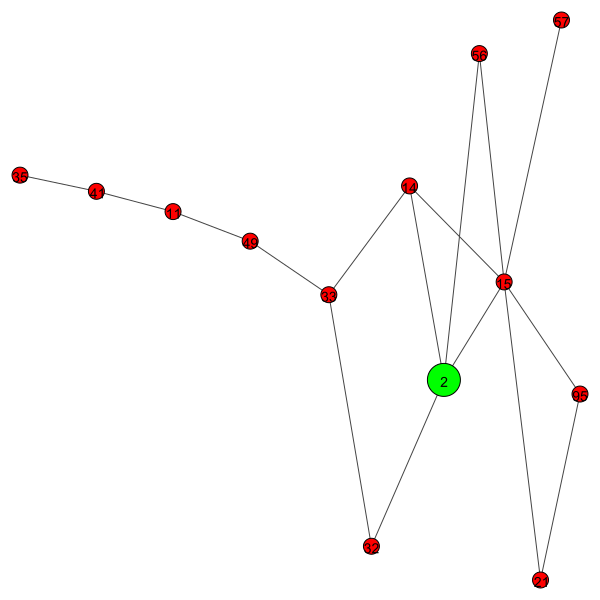

In [16]:
# 修改种子
random.seed(42)
# 创建Gds实例
gds = Gds(G)
# 添加源节点

selected_nodes = ['15','41','33']

# gds.FADE=0.3
# gds.LIMIT=0.002
result_node =[]
for node in selected_nodes:
    # 执行传播
    result_node.append(gds.nodeid_id_dict[node])

for _ in range(5): 
    gds.add_one_node_ids(selected_nodes)
    gds.emit_to_buffer(selected_nodes)
    gds.merge_from_buffer()


# 计算中心节点
central_nodes = gds.show_central()
print(selected_nodes,"关联节点:", central_nodes)


# 可视化
node_data = [(node_id, score) for node_id, score in central_nodes.items()]


nodes_vids =[gds.nodeid_id_dict[i[0]] for i in node_data]
print(nodes_vids)
result_node.extend(nodes_vids)
result_node=list(set(result_node))
black_subgraph =gds.G.subgraph(result_node)
print(result_node)
ig.plot(black_subgraph,vertex_label=black_subgraph.vs["node_id"])


In [17]:
len(result_node)

13

In [18]:
result_node

[32, 33, 2, 35, 41, 11, 14, 15, 49, 21, 56, 57, 95]

In [19]:
gds.G.vs[19]

igraph.Vertex(<igraph.Graph object at 0x0000024A0ABED940>, 19, {'node_id': '19', 'color': 'red', 'size': 16})

In [20]:
gds.nodeid_id_dict['19']

19

In [21]:
# 修改种子
random.seed(42)
# 创建Gds实例
gds = Gds(G)
# 添加源节点
gds.FADE=-0.3
node_ids =list(gds.nodeid_id_dict.keys())


# gds.LIMIT=0.002
result_node =[]

gds.add_one_node_ids(node_ids)

gds.emit_to_buffer(node_ids)


In [22]:
gds.add_one_node_ids(['41','33'])

gds.FADE=0.3

gds.emit_to_buffer(node_ids)

In [23]:
gds.merge_from_buffer()


# 计算中心节点
central_nodes = gds.show_central()
print("中心节点:", central_nodes)



中心节点: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0, '33': 0, '34': 0, '35': 0, '36': 0, '37': 0, '38': 0, '39': 0, '40': 0, '41': 0, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 0, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 0, '64': 0, '65': 0, '66': 0, '67': 0, '68': 0, '69': 0, '70': 0, '71': 0, '72': 0, '73': 0, '74': 0, '75': 0, '76': 0, '77': 0, '78': 0, '79': 0, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 0, '86': 0, '87': 0, '88': 0, '89': 0, '90': 0, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 0, '98': 0, '99': 0, '100': 0, '101': 0, '102': 0, '103': 0, '104': 0, '105': 0, '106': 0, '107': 0, '108': 0, '109': 0, '11

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99

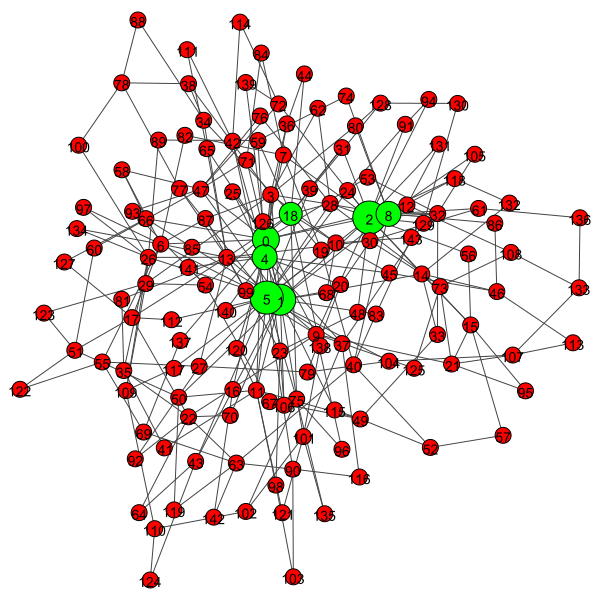

In [24]:


# 可视化
node_data = [(node_id, score) for node_id, score in central_nodes.items()]


nodes_vids =[gds.nodeid_id_dict[i[0]] for i in node_data]
print(nodes_vids)
result_node.extend(nodes_vids)
result_node=list(set(result_node))
black_subgraph =gds.G.subgraph(result_node)
print(result_node)
ig.plot(black_subgraph,vertex_label=black_subgraph.vs["node_id"])


[2, 14, 21, 56, 57, 95, 15, 11, 35, 41, 32, 49, 33]
[32, 33, 2, 35, 41, 11, 14, 15, 49, 21, 56, 57, 95]


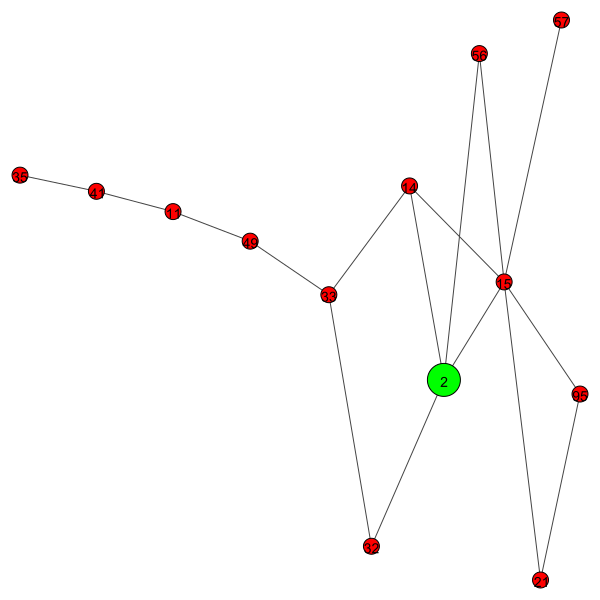

In [25]:
# 修改种子
random.seed(42)
# 创建Gds实例
gds = Gds(G)
# 添加源节点

selected_nodes = ['15','41','33']

# gds.FADE=0.3
# gds.LIMIT=0.002
result_node =[]
key_nodes =gds.neg_key_nodes(selected_nodes)


key_nodes

# # 计算中心节点
# central_nodes = gds.show_central()
# print(selected_nodes,"关联节点:", central_nodes)

# result_node.extend(selected_nodes)
# 可视化
node_data = [(node_id, score) for node_id, score in key_nodes.items()]


nodes_vids =[gds.nodeid_id_dict[i[0]] for i in node_data]
print(nodes_vids)
result_node.extend(nodes_vids)
result_node=list(set(result_node))
black_subgraph =gds.G.subgraph(result_node)
print(result_node)
ig.plot(black_subgraph,vertex_label=black_subgraph.vs["node_id"])


[15, 2, 41, 11, 33, 14, 21, 32, 35, 49, 56, 57, 95]
[32, 33, 2, 35, 41, 11, 14, 15, 49, 21, 56, 57, 95]


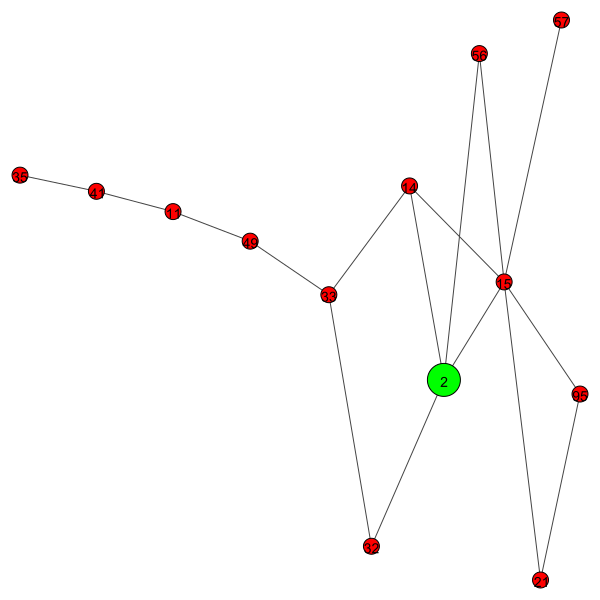

In [26]:
# 修改种子
random.seed(42)
# 创建Gds实例
gds = Gds(G)
# 添加源节点

selected_nodes = ['15','41','33']

# gds.FADE=0.3
# gds.LIMIT=0.002
result_node =[]
key_nodes =gds.pos_key_nodes(selected_nodes)


key_nodes

# # 计算中心节点
# central_nodes = gds.show_central()
# print(selected_nodes,"关联节点:", central_nodes)

# result_node.extend(selected_nodes)
# 可视化
node_data = [(node_id, score) for node_id, score in key_nodes.items()]


nodes_vids =[gds.nodeid_id_dict[i[0]] for i in node_data]
print(nodes_vids)
result_node.extend(nodes_vids)
result_node=list(set(result_node))
black_subgraph =gds.G.subgraph(result_node)
print(result_node)
ig.plot(black_subgraph,vertex_label=black_subgraph.vs["node_id"])
